In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

file = r'/Users/jpnousu/Library/CloudStorage/OneDrive-Valtion/Krycklan data/HYDROLOGY/SITES_WB-Q_SVB_LAB-C16_20070322-20191231_L2_daily.csv'
q = pd.read_csv(file, skiprows=25, index_col=0, parse_dates=True)
q['sq'] = q['Q'] / 67872000 * 1000 * 60 * 60 * 24 # to specific discharge

res_file = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/results/202408220937.nc'
results = xr.open_dataset(res_file)
results['total_evapotranspiration'] = results['canopy_evaporation'] + results['bucket_evaporation'] + results['canopy_transpiration']

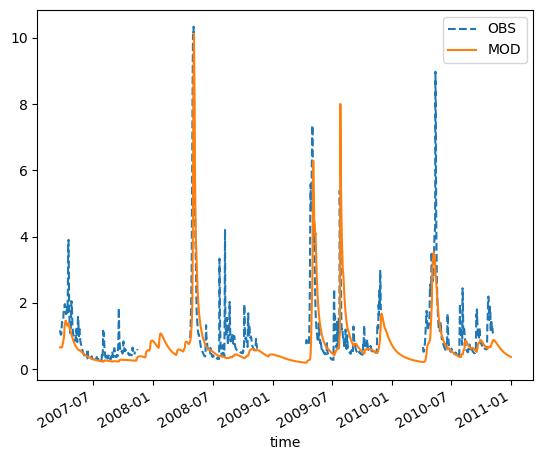

In [73]:
plt.plot(q.loc['2007-01-01':'2010-12-31', 'sq'], linestyle='--', label='OBS')
(results['bucket_surface_runoff'].sel(time=slice('2007-01-01', '2010-12-31')).mean(dim=['lat','lon']) + results['top_baseflow']).sel(time=slice('2007-03-22', '2010-12-31')).plot(label='MOD')
plt.legend()

In [59]:
q['sq_mod'] = (results['bucket_surface_runoff'].sel(time=slice('2007-03-22', '2019-12-31')).mean(dim=['lat','lon']) + results['top_baseflow']).sel(time=slice('2007-03-22', '2019-12-31'))

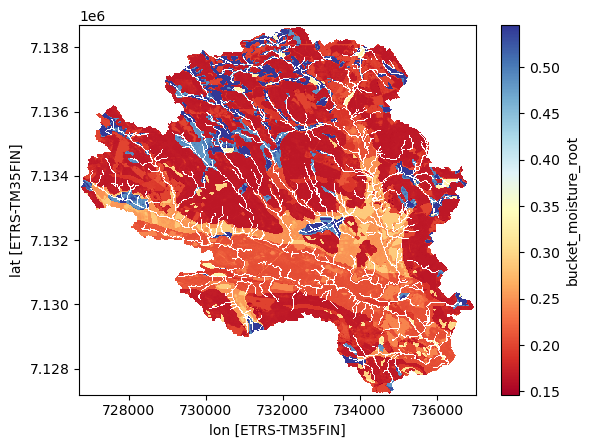

In [51]:
results['bucket_moisture_root'].mean(dim=['time']).plot(cmap='RdYlBu')

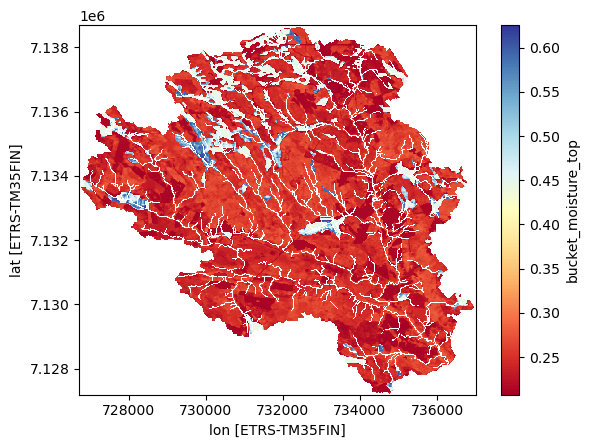

In [52]:
results['bucket_moisture_top'].mean(dim=['time']).plot(cmap='RdYlBu')

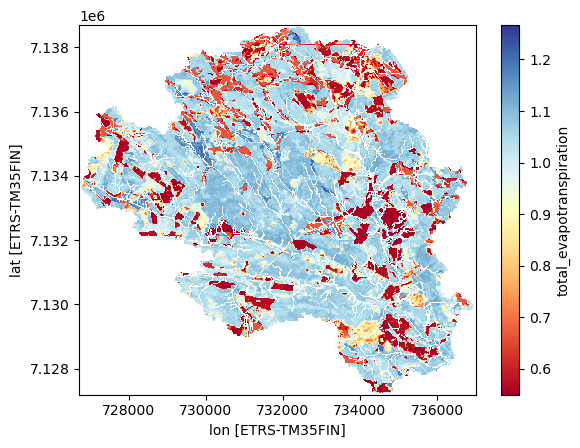

In [56]:
results['total_evapotranspiration'].mean(dim=['time']).plot(cmap='RdYlBu')